In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("customer churn data.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###replacing blanks with 0 as tenure is 0 and no. total charges are recorded

In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df["customerID"].duplicated().sum()

np.int64(0)

In [12]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

##converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


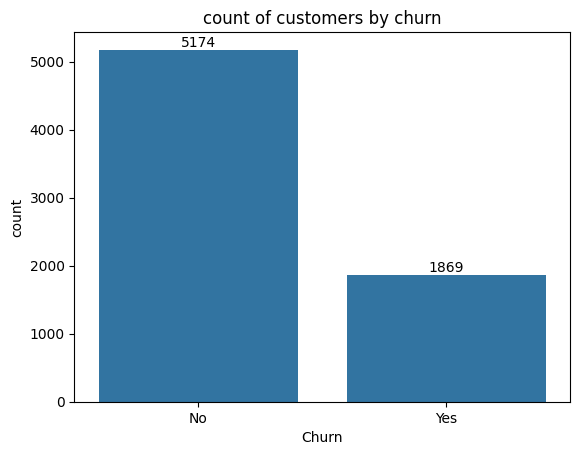

In [14]:
ax=sns.countplot(x=df["Churn"],data=df)
ax.bar_label(ax.containers[0])
plt.title("count of customers by churn")
plt.show()

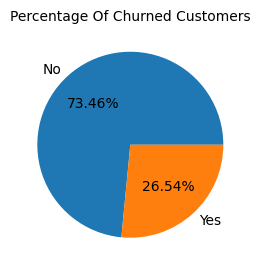

In [15]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels= gb.index,autopct="%1.2f%%" )
plt.title("Percentage Of Churned Customers",fontsize=10)
plt.show()


##from the given pie chart we can conclude that 26.54% of our customers have churned out.
##now let's explore the reason behind it.

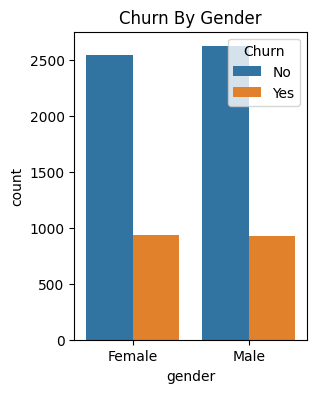

In [16]:
plt.figure(figsize=(3,4))
sns.countplot(x=df["gender"],data=df,hue="Churn")
plt.title("Churn By Gender")
plt.show()

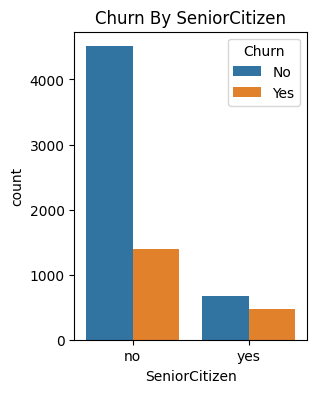

In [17]:
plt.figure(figsize=(3,4))
sns.countplot(x=df["SeniorCitizen"],data=df,hue="Churn")
plt.title("Churn By SeniorCitizen")
plt.show()

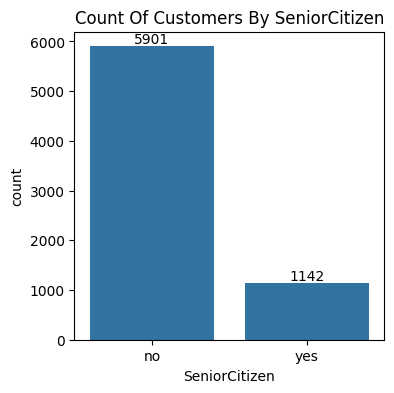

In [18]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x=df["SeniorCitizen"],data=df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By SeniorCitizen")
plt.show()

<Figure size 300x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

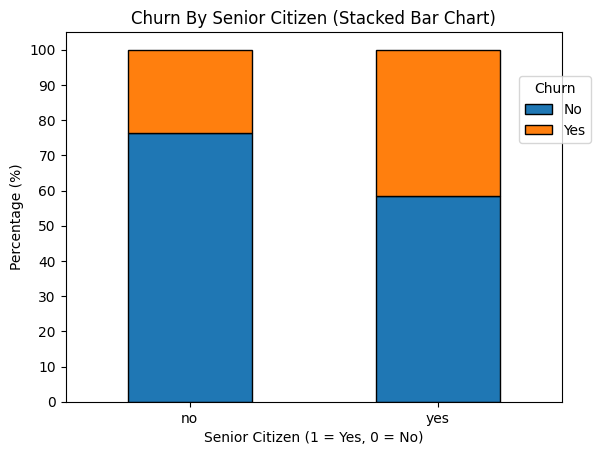

In [19]:
plt.figure(figsize=(3,4))
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate the percentage
percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(4, 4))
percentage_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title("Churn By Senior Citizen (Stacked Bar Chart)")
plt.xlabel("Senior Citizen (1 = Yes, 0 = No)")
plt.ylabel("Percentage (%)")
plt.legend(title='Churn',bbox_to_anchor=(0.9,0.9))
plt.xticks(rotation=0)
plt.yticks(range(0, 101, 10))
plt.show()

##comparatively a greater percentage of people in senior citizen category have churned.

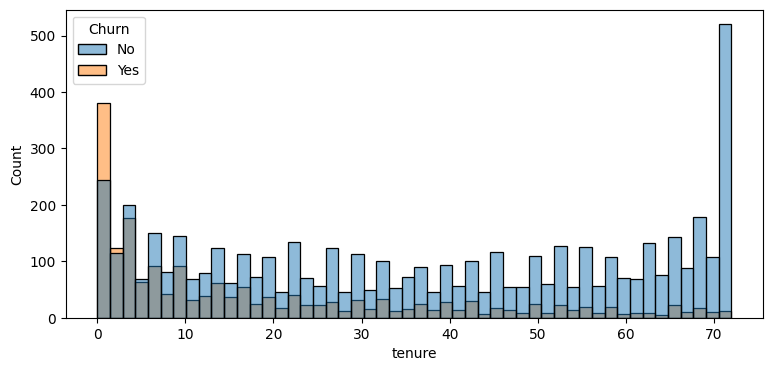

In [20]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=50,hue="Churn")
plt.show()

##people who have used our services for a long time have stayed and people who have used our services.
##1 or 2 months have churned.

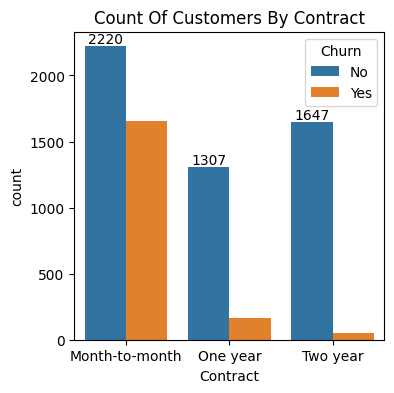

In [21]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x=df["Contract"],data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Contract")
plt.show()

##people who have month to month contract are likely to churn then from those who have 1 or 2 year or contract. 

In [22]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

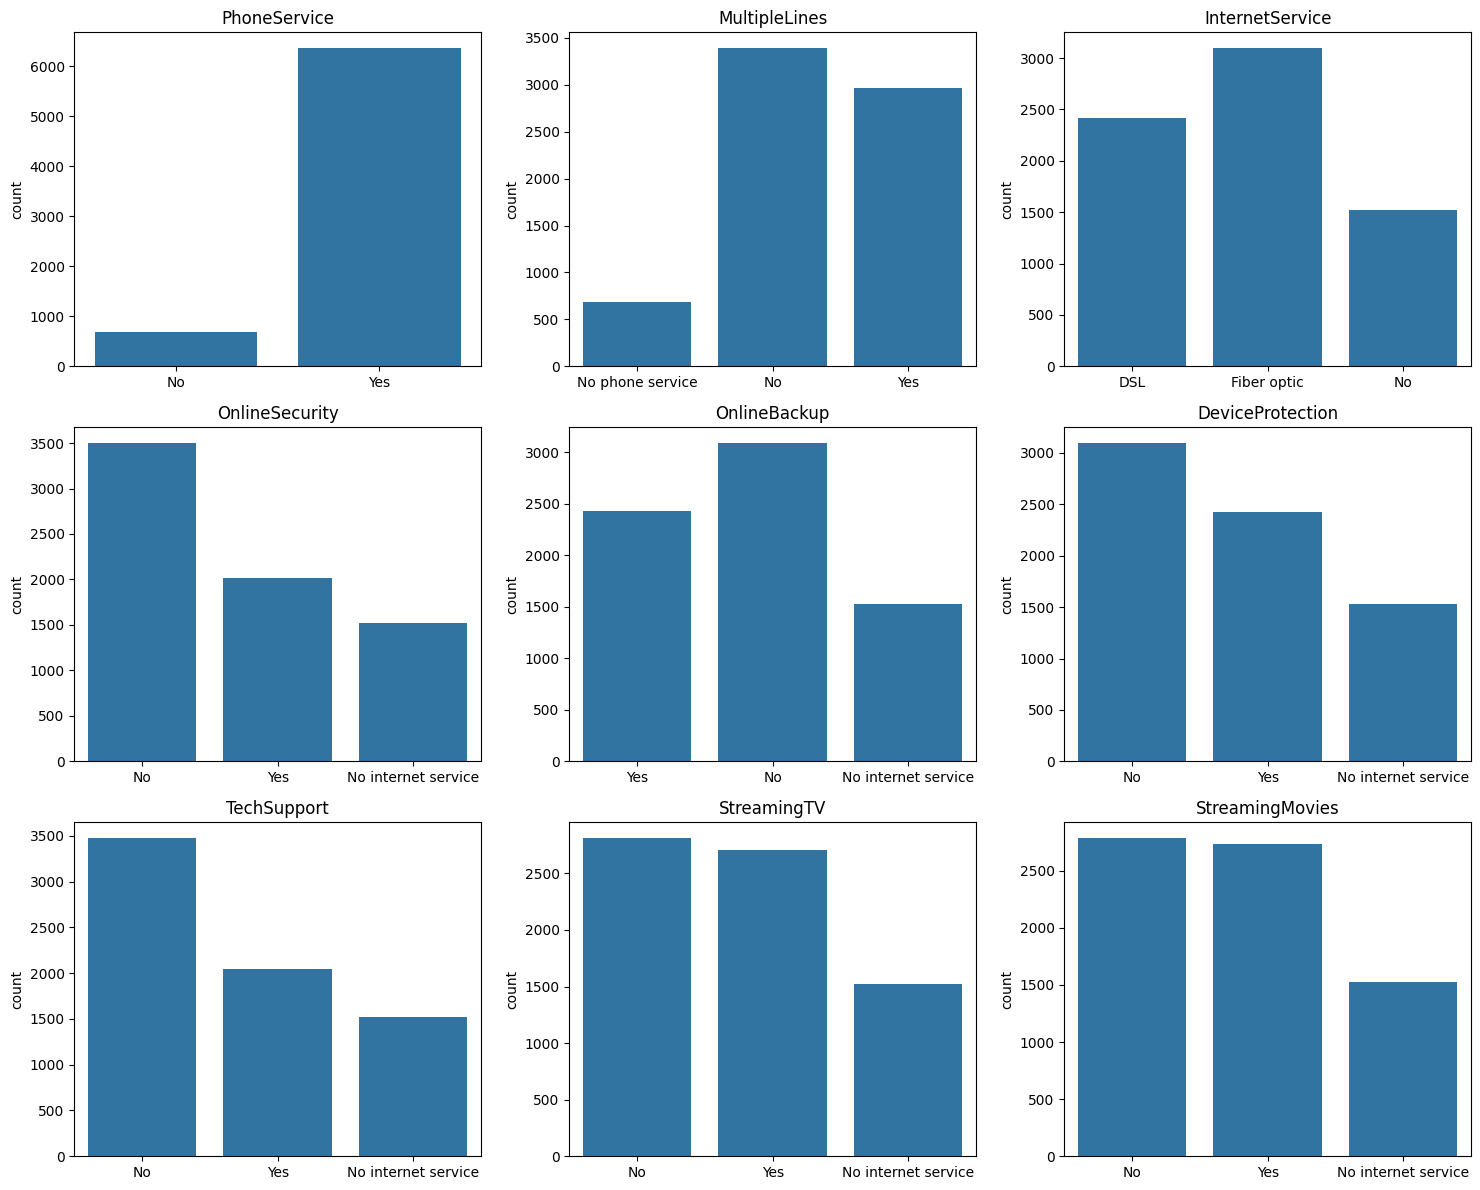

In [23]:
# Define columns
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
           'StreamingMovies']

# Create figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Iterate over columns and axes
for i, (col, ax) in enumerate(zip(columns, axes.flat)):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')

# Hide empty subplots (if any)
for ax in axes.flat[i+1:]:
    ax.axis('off')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

##the majority of custmers who do'nt churn tend to have services like phoneservice,internetservice,(particularly dsl),
##and onlinesecurity enabled. For services like onlinebackup,techsupport, and streamingtv, churn rates are noticeably higher 
##when these services are not used or are unavailable.

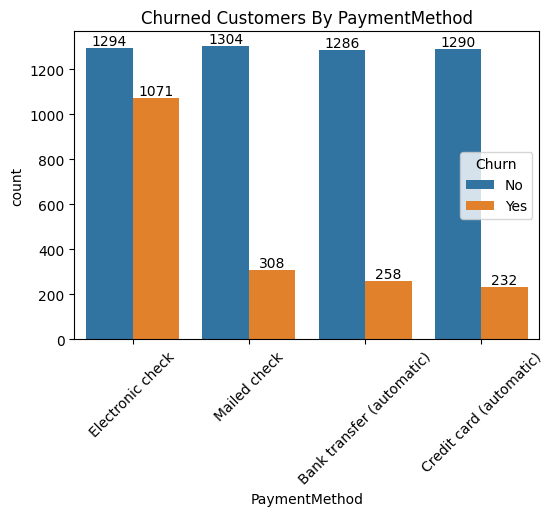

In [34]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x=df["PaymentMethod"],data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers By PaymentMethod")
plt.xticks(rotation=45)
plt.show()

##customer is likely to churn when he is using electronic checkas a payment method..